# Differential abundance

In [1]:
#Libraries
library("phyloseq")
library("microbiome")
library("IRdisplay")
library("ANCOMBC")
library("DT")
library("tidyverse")
#Load phyloseq object
load("phyloseq.RData")

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.tree

## ANCOM-BC
### Preprocess

In [2]:
#Check media and site levels
levels(phyloseq::sample_data(pseq)$media)
levels(phyloseq::sample_data(pseq)$site)

[1] "CVP" "ENV" "KBC" "TSA"

[1] "LD" "MD" "UD"

In [3]:
#Ensure ENV is our reference level for media
phyloseq::sample_data(pseq)$media <- factor(phyloseq::sample_data(pseq)$media,
                                                   levels = c("ENV", "CVP", "KBC", "TSA"))
levels(phyloseq::sample_data(pseq)$media)
#Ensure UD is our reference level for site
phyloseq::sample_data(pseq)$site <- factor(phyloseq::sample_data(pseq)$site,
                                                   levels = c("UD", "MD", "LD"))
levels(phyloseq::sample_data(pseq)$site)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



[1] "ENV" "CVP" "KBC" "TSA"

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



[1] "UD" "MD" "LD"

### Analysis

In [4]:
#Run ANCOMBC
ancom_class_out <- ANCOMBC::ancombc2(data = pseq, fix_formula = "media + site",
                              p_adj_method = "holm", tax_level ="Class")
#Save as file
save(ancom_class_out, file = "ANCOMBC2_class_analysis.RData")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namesp

In [5]:
load("ANCOMBC2_class_analysis.RData")

In [6]:
unique(tax_table(pseq)[,"Class"])
ancom_class_out$res

,Class
7aa9cce284b4825a1355b6b5d0bd9211,NA
083eccfaca86e8ec2f372cad7a0bb06c,Fusobacteriia
ec4e35ef3f3decd177d53a446c3b044e,BD1-5
576eb0d6d6a5b6944e1ca002842c3e35,SM2F11
a0546d4ec7d442319b22bd70d315aee5,ZB2
d0debf5d43b34ae3ed7e62068b80dd0c,TM7-1
b7ce5ed739a95fc66e8202d0ca510a02,Deinococci
4195f8712066abcf1a74233072bf0fe4,Nostocophycideae
ee837dfc8f27087a3b7ef7a91876a3d7,Chloroplast
0c214ebfc6d66574a2eede3ffbae6c0c,Synechococcophycideae


taxon,lfc_(Intercept),lfc_mediaCVP,lfc_mediaKBC,lfc_mediaTSA,lfc_siteMD,lfc_siteLD,se_(Intercept),se_mediaCVP,se_mediaKBC,⋯,q_mediaKBC,q_mediaTSA,q_siteMD,q_siteLD,diff_(Intercept),diff_mediaCVP,diff_mediaKBC,diff_mediaTSA,diff_siteMD,diff_siteLD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
Kingdom:Bacteria,3.72714536,-4.42752028,-4.7700845,-2.5723953,-0.71912355,-0.346954316,0.6590379,0.8105411,0.7819162,⋯,1.797465e-08,8.765444e-03,1,1.0000000,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Phylum:Proteobacteria,1.81024482,-1.72828197,-1.7858518,-2.6052996,0.52218644,-0.075487623,0.4762525,0.6020593,0.5719794,⋯,1.525323e-02,4.979915e-04,1,1.0000000,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Class:Fusobacteriia,2.22511504,-1.69210279,-1.7496726,-2.5691205,-0.37086756,-0.508447429,0.4635397,0.5875706,0.5573842,⋯,1.525323e-02,4.558693e-04,1,1.0000000,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Phylum:OD1,0.93590286,-0.59019165,-0.6477615,-1.4672093,0.27921230,0.229809180,0.3917237,0.5056022,0.4748850,⋯,3.451108e-01,1.883566e-02,1,1.0000000,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
Class:ZB2,1.46631257,-1.18378435,-1.2413541,-2.0608020,0.25718010,-0.003804185,0.4540900,0.5767991,0.5465347,⋯,9.251094e-02,4.534394e-03,1,1.0000000,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
Phylum:Cyanobacteria,4.79883088,-5.46181287,-5.5193827,-6.3388305,-0.15276694,0.034152090,0.3498766,0.4575374,0.4266796,⋯,8.495436e-37,5.833734e-37,1,1.0000000,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Class:Nostocophycideae,4.07101416,-4.89501864,-4.9525884,-5.7720363,0.36283878,0.426709510,0.3628631,0.4725004,0.4416604,⋯,9.094993e-28,6.208754e-29,1,1.0000000,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Class:[Pedosphaerae],2.27283170,-2.10945635,-2.1670262,-2.9864740,0.02320353,-0.106622999,0.4278754,0.5469035,0.5164312,⋯,3.529273e-04,4.274298e-06,1,1.0000000,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Phylum:Verrucomicrobia,2.06749638,-2.00544598,-2.0630158,-2.8824637,0.07685095,0.221712201,0.3947879,0.5091082,0.4784087,⋯,2.424075e-04,1.822481e-06,1,1.0000000,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE


In [7]:
#Primary analysis
res_prim <- ancom_class_out$res %>%
    mutate_if(is.numeric, function(x) round(x,2))
res_prim

taxon,lfc_(Intercept),lfc_mediaCVP,lfc_mediaKBC,lfc_mediaTSA,lfc_siteMD,lfc_siteLD,se_(Intercept),se_mediaCVP,se_mediaKBC,⋯,q_mediaKBC,q_mediaTSA,q_siteMD,q_siteLD,diff_(Intercept),diff_mediaCVP,diff_mediaKBC,diff_mediaTSA,diff_siteMD,diff_siteLD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
Kingdom:Bacteria,3.73,-4.43,-4.77,-2.57,-0.72,-0.35,0.66,0.81,0.78,⋯,0.00,0.01,1,1.00,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Phylum:Proteobacteria,1.81,-1.73,-1.79,-2.61,0.52,-0.08,0.48,0.60,0.57,⋯,0.02,0.00,1,1.00,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Class:Fusobacteriia,2.23,-1.69,-1.75,-2.57,-0.37,-0.51,0.46,0.59,0.56,⋯,0.02,0.00,1,1.00,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Phylum:OD1,0.94,-0.59,-0.65,-1.47,0.28,0.23,0.39,0.51,0.47,⋯,0.35,0.02,1,1.00,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
Class:ZB2,1.47,-1.18,-1.24,-2.06,0.26,0.00,0.45,0.58,0.55,⋯,0.09,0.00,1,1.00,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
Phylum:Cyanobacteria,4.80,-5.46,-5.52,-6.34,-0.15,0.03,0.35,0.46,0.43,⋯,0.00,0.00,1,1.00,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Class:Nostocophycideae,4.07,-4.90,-4.95,-5.77,0.36,0.43,0.36,0.47,0.44,⋯,0.00,0.00,1,1.00,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Class:[Pedosphaerae],2.27,-2.11,-2.17,-2.99,0.02,-0.11,0.43,0.55,0.52,⋯,0.00,0.00,1,1.00,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
Phylum:Verrucomicrobia,2.07,-2.01,-2.06,-2.88,0.08,0.22,0.39,0.51,0.48,⋯,0.00,0.00,1,1.00,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE


In [8]:
#Output of anlaysis compared to reference groups
res_ancom_class  <- ancom_class_out$res
#Remove large object
rm(ancom_class_out)
#Check top rows of results
head(res_ancom_class)
#Save as file
write.table(x = res_ancom_class, file = "ANCOMBC2_class_results.tsv",
            quote = FALSE, row.names = FALSE)
#Create data table
m <- DT::datatable(res_ancom_class)
#Save data table as html
htmlwidgets::saveWidget(m, "ANCOM_class_results.html", selfcontained = FALSE)

,taxon,lfc_(Intercept),lfc_mediaCVP,lfc_mediaKBC,lfc_mediaTSA,lfc_siteMD,lfc_siteLD,se_(Intercept),se_mediaCVP,se_mediaKBC,⋯,q_mediaKBC,q_mediaTSA,q_siteMD,q_siteLD,diff_(Intercept),diff_mediaCVP,diff_mediaKBC,diff_mediaTSA,diff_siteMD,diff_siteLD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Kingdom:Bacteria,3.7271454,-4.4275203,-4.7700845,-2.572395,-0.7191235,-0.346954316,0.6590379,0.8105411,0.7819162,⋯,1.797465e-08,8.765444e-03,1,1,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
2,Phylum:Proteobacteria,1.8102448,-1.7282820,-1.7858518,-2.605300,0.5221864,-0.075487623,0.4762525,0.6020593,0.5719794,⋯,1.525323e-02,4.979915e-04,1,1,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
3,Class:Fusobacteriia,2.2251150,-1.6921028,-1.7496726,-2.569120,-0.3708676,-0.508447429,0.4635397,0.5875706,0.5573842,⋯,1.525323e-02,4.558693e-04,1,1,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
4,Phylum:OD1,0.9359029,-0.5901917,-0.6477615,-1.467209,0.2792123,0.229809180,0.3917237,0.5056022,0.4748850,⋯,3.451108e-01,1.883566e-02,1,1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
5,Class:ZB2,1.4663126,-1.1837843,-1.2413541,-2.060802,0.2571801,-0.003804185,0.4540900,0.5767991,0.5465347,⋯,9.251094e-02,4.534394e-03,1,1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
6,Phylum:Cyanobacteria,4.7988309,-5.4618129,-5.5193827,-6.338831,-0.1527669,0.034152090,0.3498766,0.4575374,0.4266796,⋯,8.495436e-37,5.833734e-37,1,1,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE


#### Media

In [9]:
#Extract the taxon colum and the media columns from the results
#Get positions of columns which contain "media"
media_colnames_pos <- grep("media", colnames(res_ancom_class))
#Taxon column and media column names
media_colnames <- colnames(res_ancom_class)[c(1,media_colnames_pos)]
media_colnames
#Create new df with only taxon and media columns
res_ancom_class_media <- res_ancom_class[,media_colnames]
head(res_ancom_class_media)

[1] "taxon"         "lfc_mediaCVP"  "lfc_mediaKBC"  "lfc_mediaTSA" 
 [5] "se_mediaCVP"   "se_mediaKBC"   "se_mediaTSA"   "W_mediaCVP"   
 [9] "W_mediaKBC"    "W_mediaTSA"    "p_mediaCVP"    "p_mediaKBC"   
[13] "p_mediaTSA"    "q_mediaCVP"    "q_mediaKBC"    "q_mediaTSA"   
[17] "diff_mediaCVP" "diff_mediaKBC" "diff_mediaTSA"

,taxon,lfc_mediaCVP,lfc_mediaKBC,lfc_mediaTSA,se_mediaCVP,se_mediaKBC,se_mediaTSA,W_mediaCVP,W_mediaKBC,W_mediaTSA,p_mediaCVP,p_mediaKBC,p_mediaTSA,q_mediaCVP,q_mediaKBC,q_mediaTSA,diff_mediaCVP,diff_mediaKBC,diff_mediaTSA
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,Kingdom:Bacteria,-4.4275203,-4.7700845,-2.572395,0.8105411,0.7819162,0.8398309,-5.462426,-6.100506,-3.062992,4.696724e-08,1.057332e-09,2.191361e-03,8.454103e-07,1.797465e-08,8.765444e-03,TRUE,TRUE,TRUE
2,Phylum:Proteobacteria,-1.7282820,-1.7858518,-2.605300,0.6020593,0.5719794,0.6327443,-2.870617,-3.122231,-4.117460,4.096709e-03,1.794861e-03,3.830704e-05,3.581019e-02,1.525323e-02,4.979915e-04,TRUE,TRUE,TRUE
3,Class:Fusobacteriia,-1.6921028,-1.7496726,-2.569120,0.5875706,0.5573842,0.6183551,-2.879829,-3.139078,-4.154766,3.978910e-03,1.694804e-03,3.256210e-05,3.581019e-02,1.525323e-02,4.558693e-04,TRUE,TRUE,TRUE
4,Phylum:OD1,-0.5901917,-0.6477615,-1.467209,0.5056022,0.4748850,0.5368753,-1.167304,-1.364039,-2.732868,2.430875e-01,1.725554e-01,6.278553e-03,5.295067e-01,3.451108e-01,1.883566e-02,FALSE,FALSE,TRUE
5,Class:ZB2,-1.1837843,-1.2413541,-2.060802,0.5767991,0.5465347,0.6076563,-2.052334,-2.271318,-3.391394,4.013724e-02,2.312774e-02,6.953798e-04,1.605490e-01,9.251094e-02,4.534394e-03,FALSE,FALSE,TRUE
6,Phylum:Cyanobacteria,-5.4618129,-5.5193827,-6.338831,0.4575374,0.4266796,0.4889370,-11.937414,-12.935660,-12.964514,7.553554e-33,2.831812e-38,1.944578e-38,2.266066e-31,8.495436e-37,5.833734e-37,TRUE,TRUE,TRUE


In [10]:
#Remove any taxon where there are no TRUE values
#I.e. no significant difference found for the media samples
#Number of biomarkers prior to removal
nrow(res_ancom_class_media)
#Extract rows that contain at least one TRUE value
res_ancom_class_media_sig <- res_ancom_class_media |>
                                dplyr::filter_all(
                                    dplyr::any_vars(. %in% TRUE)
                                )
#Number of rows and the top of the new df
nrow(res_ancom_class_media_sig)
head(res_ancom_class_media_sig)

[1] 32

[1] 31

,taxon,lfc_mediaCVP,lfc_mediaKBC,lfc_mediaTSA,se_mediaCVP,se_mediaKBC,se_mediaTSA,W_mediaCVP,W_mediaKBC,W_mediaTSA,p_mediaCVP,p_mediaKBC,p_mediaTSA,q_mediaCVP,q_mediaKBC,q_mediaTSA,diff_mediaCVP,diff_mediaKBC,diff_mediaTSA
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,Kingdom:Bacteria,-4.4275203,-4.7700845,-2.572395,0.8105411,0.7819162,0.8398309,-5.462426,-6.100506,-3.062992,4.696724e-08,1.057332e-09,2.191361e-03,8.454103e-07,1.797465e-08,8.765444e-03,TRUE,TRUE,TRUE
2,Phylum:Proteobacteria,-1.7282820,-1.7858518,-2.605300,0.6020593,0.5719794,0.6327443,-2.870617,-3.122231,-4.117460,4.096709e-03,1.794861e-03,3.830704e-05,3.581019e-02,1.525323e-02,4.979915e-04,TRUE,TRUE,TRUE
3,Class:Fusobacteriia,-1.6921028,-1.7496726,-2.569120,0.5875706,0.5573842,0.6183551,-2.879829,-3.139078,-4.154766,3.978910e-03,1.694804e-03,3.256210e-05,3.581019e-02,1.525323e-02,4.558693e-04,TRUE,TRUE,TRUE
4,Phylum:OD1,-0.5901917,-0.6477615,-1.467209,0.5056022,0.4748850,0.5368753,-1.167304,-1.364039,-2.732868,2.430875e-01,1.725554e-01,6.278553e-03,5.295067e-01,3.451108e-01,1.883566e-02,FALSE,FALSE,TRUE
5,Class:ZB2,-1.1837843,-1.2413541,-2.060802,0.5767991,0.5465347,0.6076563,-2.052334,-2.271318,-3.391394,4.013724e-02,2.312774e-02,6.953798e-04,1.605490e-01,9.251094e-02,4.534394e-03,FALSE,FALSE,TRUE
6,Phylum:Cyanobacteria,-5.4618129,-5.5193827,-6.338831,0.4575374,0.4266796,0.4889370,-11.937414,-12.935660,-12.964514,7.553554e-33,2.831812e-38,1.944578e-38,2.266066e-31,8.495436e-37,5.833734e-37,TRUE,TRUE,TRUE


In [11]:
diversity_shannon#Create edited long df to plot log fold changes on heatmap
res_ancom_class_media_lfc_sig_fig <- res_ancom_class_media_sig |>
    #Change/mutate log change values to 0 if diff is FALSE
    #test: Is diff TRUE?
    #yes: set LFC to original value (e.g. lfc_mediaCVP)
    #no: set LFC to 0
    dplyr::mutate(lfc_mediaCVP = ifelse(test = diff_mediaCVP == TRUE,
                                        yes = lfc_mediaCVP, no = 0),
                  lfc_mediaKBC = ifelse(test = diff_mediaKBC == TRUE,
                                        yes = lfc_mediaKBC, no = 0),
                  lfc_mediaTSA = ifelse(test = diff_mediaTSA == TRUE,
                                        yes = lfc_mediaTSA, no = 0)) |>
    #Only retain taxon and log fold changes columns
    #Additionally change column names and round LFC values to 2 decimal places
    dplyr::transmute(taxon, 
              CVP = round(lfc_mediaCVP,2),
              KBC = round(lfc_mediaKBC,2), 
              TSA = round(lfc_mediaTSA,2)) |>
    #Convert to long data frame
    tidyr::pivot_longer(cols = CVP:TSA,
                        names_to = "group", 
                        values_to = "value") |>
    #Arrange order of rows based on taxons
    dplyr::arrange(taxon)
#Check new long df
head(res_ancom_class_media_lfc_sig_fig)

taxon,group,value
<chr>,<chr>,<dbl>
Class:Acidimicrobiia,CVP,-4.89
Class:Acidimicrobiia,KBC,-4.94
Class:Acidimicrobiia,TSA,-5.76
Class:Acidobacteria-6,CVP,0.00
Class:Acidobacteria-6,KBC,0.00
Class:Acidobacteria-6,TSA,-2.27


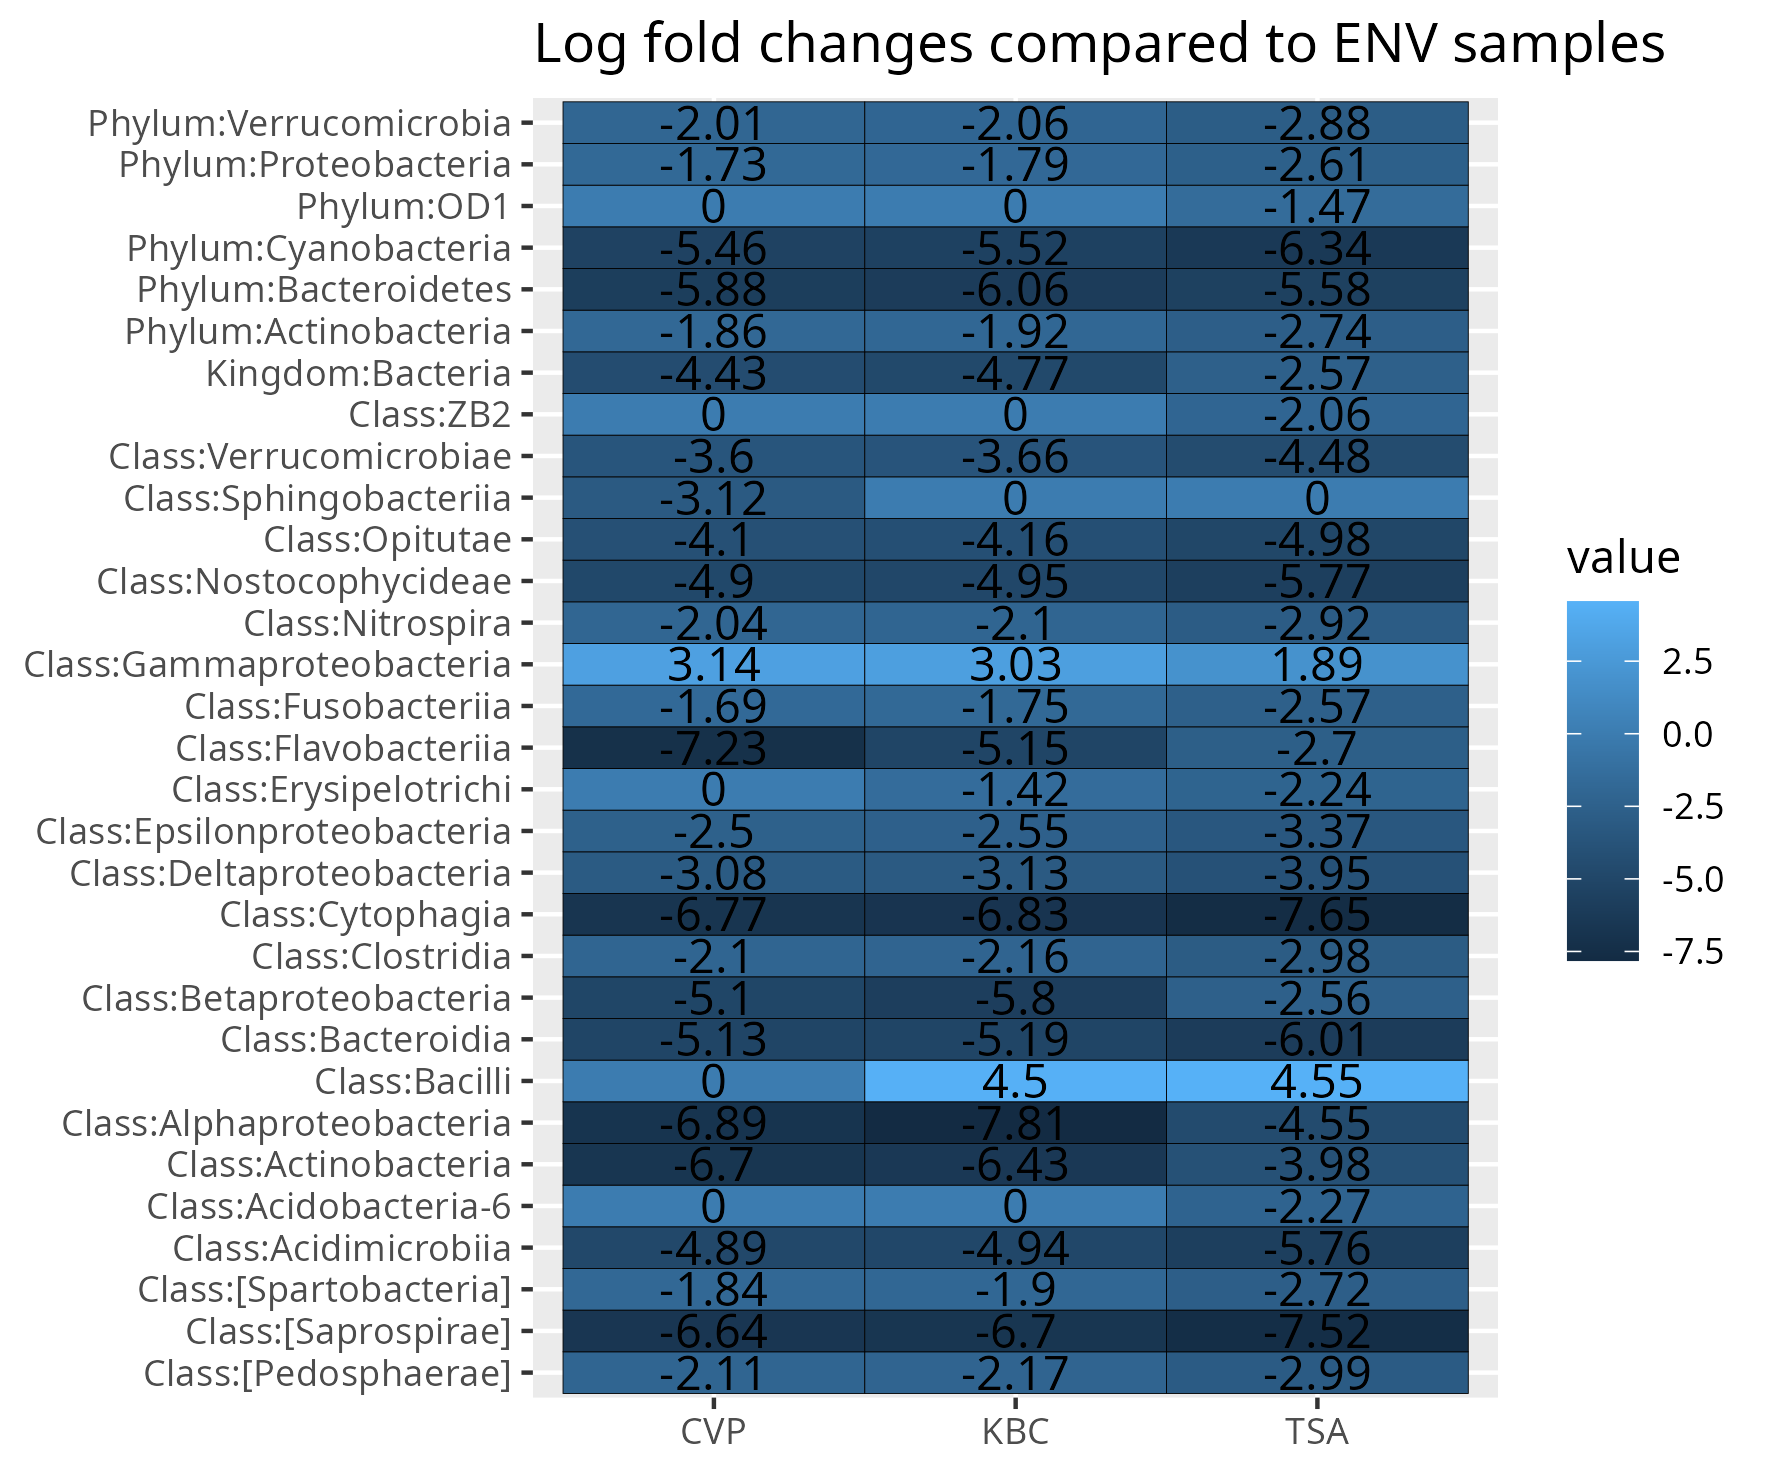

In [12]:
#LFC heatmap
heatmap_media <- ggplot(res_ancom_class_media_lfc_sig_fig, 
                        aes(x = group, y = taxon, fill = value)) +
                    #Produce ggplot as tile/heatmap style plot
                    ggplot2::geom_tile(colour = "black") +
                    #Add the LFC values as text in the cells
                    ggplot2::geom_text(aes(group, taxon, label = value), 
                                       colour = "black", size = 4) +
                    #Remove the x and y labels (NULL) and add a title
                    ggplot2::labs(x = NULL, y = NULL,
                        title = "Log fold changes compared to ENV samples")
#Save ggplot2 object with ggsave
ggsave(filename = "./ANCOMBC_class_media_ref_ENV.png", plot = heatmap_media,
      device = "png", dpi = 300, units = "mm", height = 125, width = 150)
#Display plot
IRdisplay::display_png(file = "./ANCOMBC_class_media_ref_ENV.png")

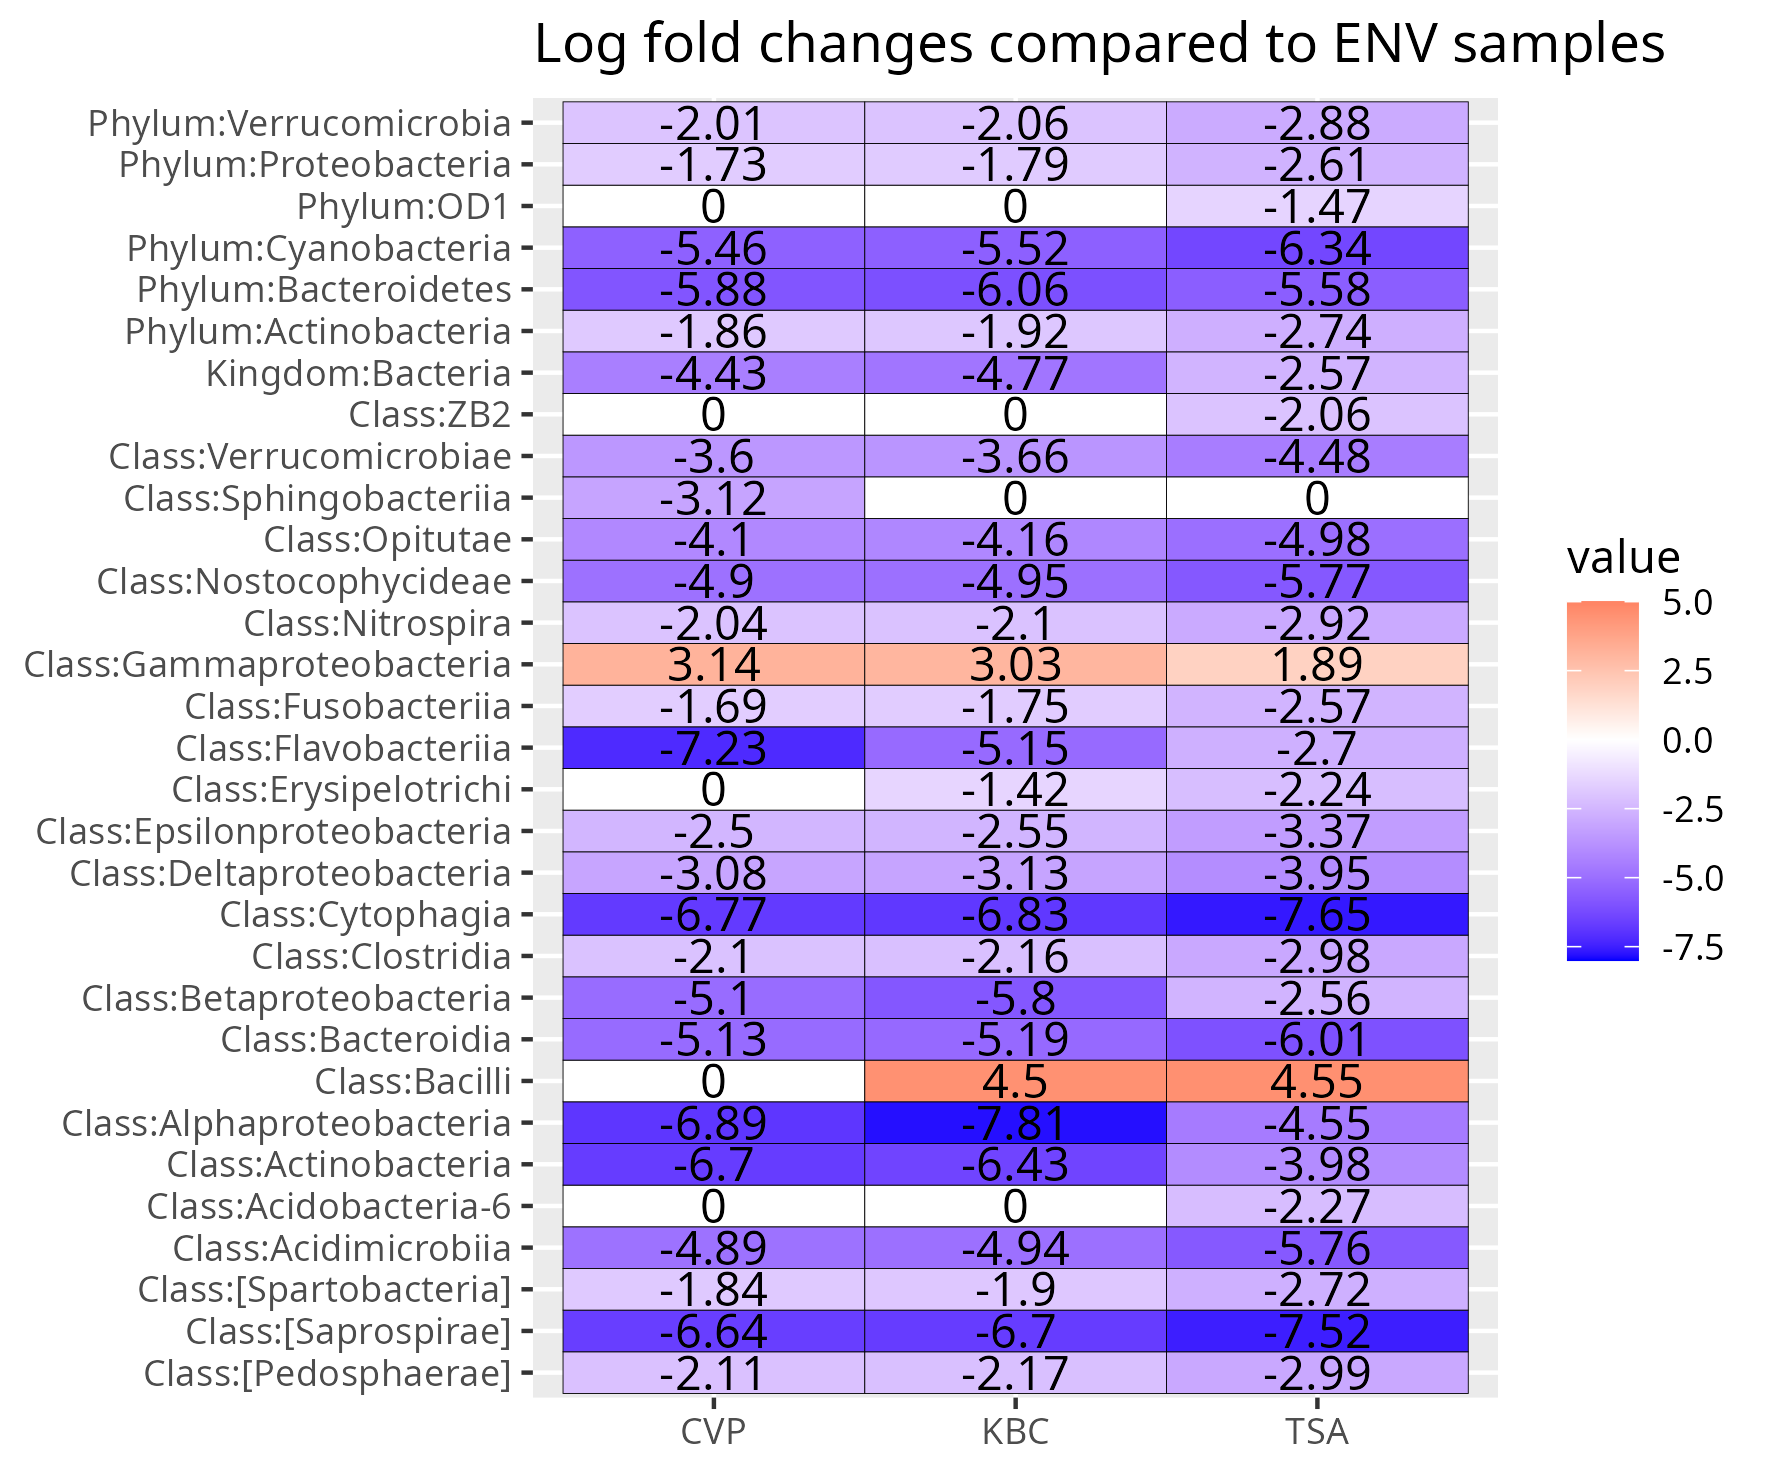

In [13]:
#Get min and max log fold changes to choose a good colour gradient for the heatmap
lo <- floor(min(res_ancom_class_media_lfc_sig_fig$value))
up <- ceiling(max(res_ancom_class_media_lfc_sig_fig$value))
mid <- 0
#Produce heatmap to show log changes compared to ENV samples
heatmap_media <- ggplot(res_ancom_class_media_lfc_sig_fig, 
                        aes(x = group, y = taxon, fill = value)) +
                    #Produce ggplot as tile/heatmap style plot
                    ggplot2::geom_tile(colour = "black") +
                    #Customise colour gradient
                    ggplot2::scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                                                 na.value = "white", midpoint = mid,
                                                 limit = c(lo,up)) +
                    #Add the LFC values as text in the cells
                    ggplot2::geom_text(aes(group, taxon, label = value), 
                                       colour = "black", size = 4) +
                    #Remove the x and y labels (NULL) and add a title
                    ggplot2::labs(x = NULL, y = NULL,
                        title = "Log fold changes compared to ENV samples")
#Save ggplot2 object with ggsave
ggsave(filename = "./ANCOMBC_class_media_ref_ENV.png", plot = heatmap_media,
      device = "png", dpi = 300, units = "mm", height = 125, width = 150)
#Display plot
IRdisplay::display_png(file = "./ANCOMBC_class_media_ref_ENV.png")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



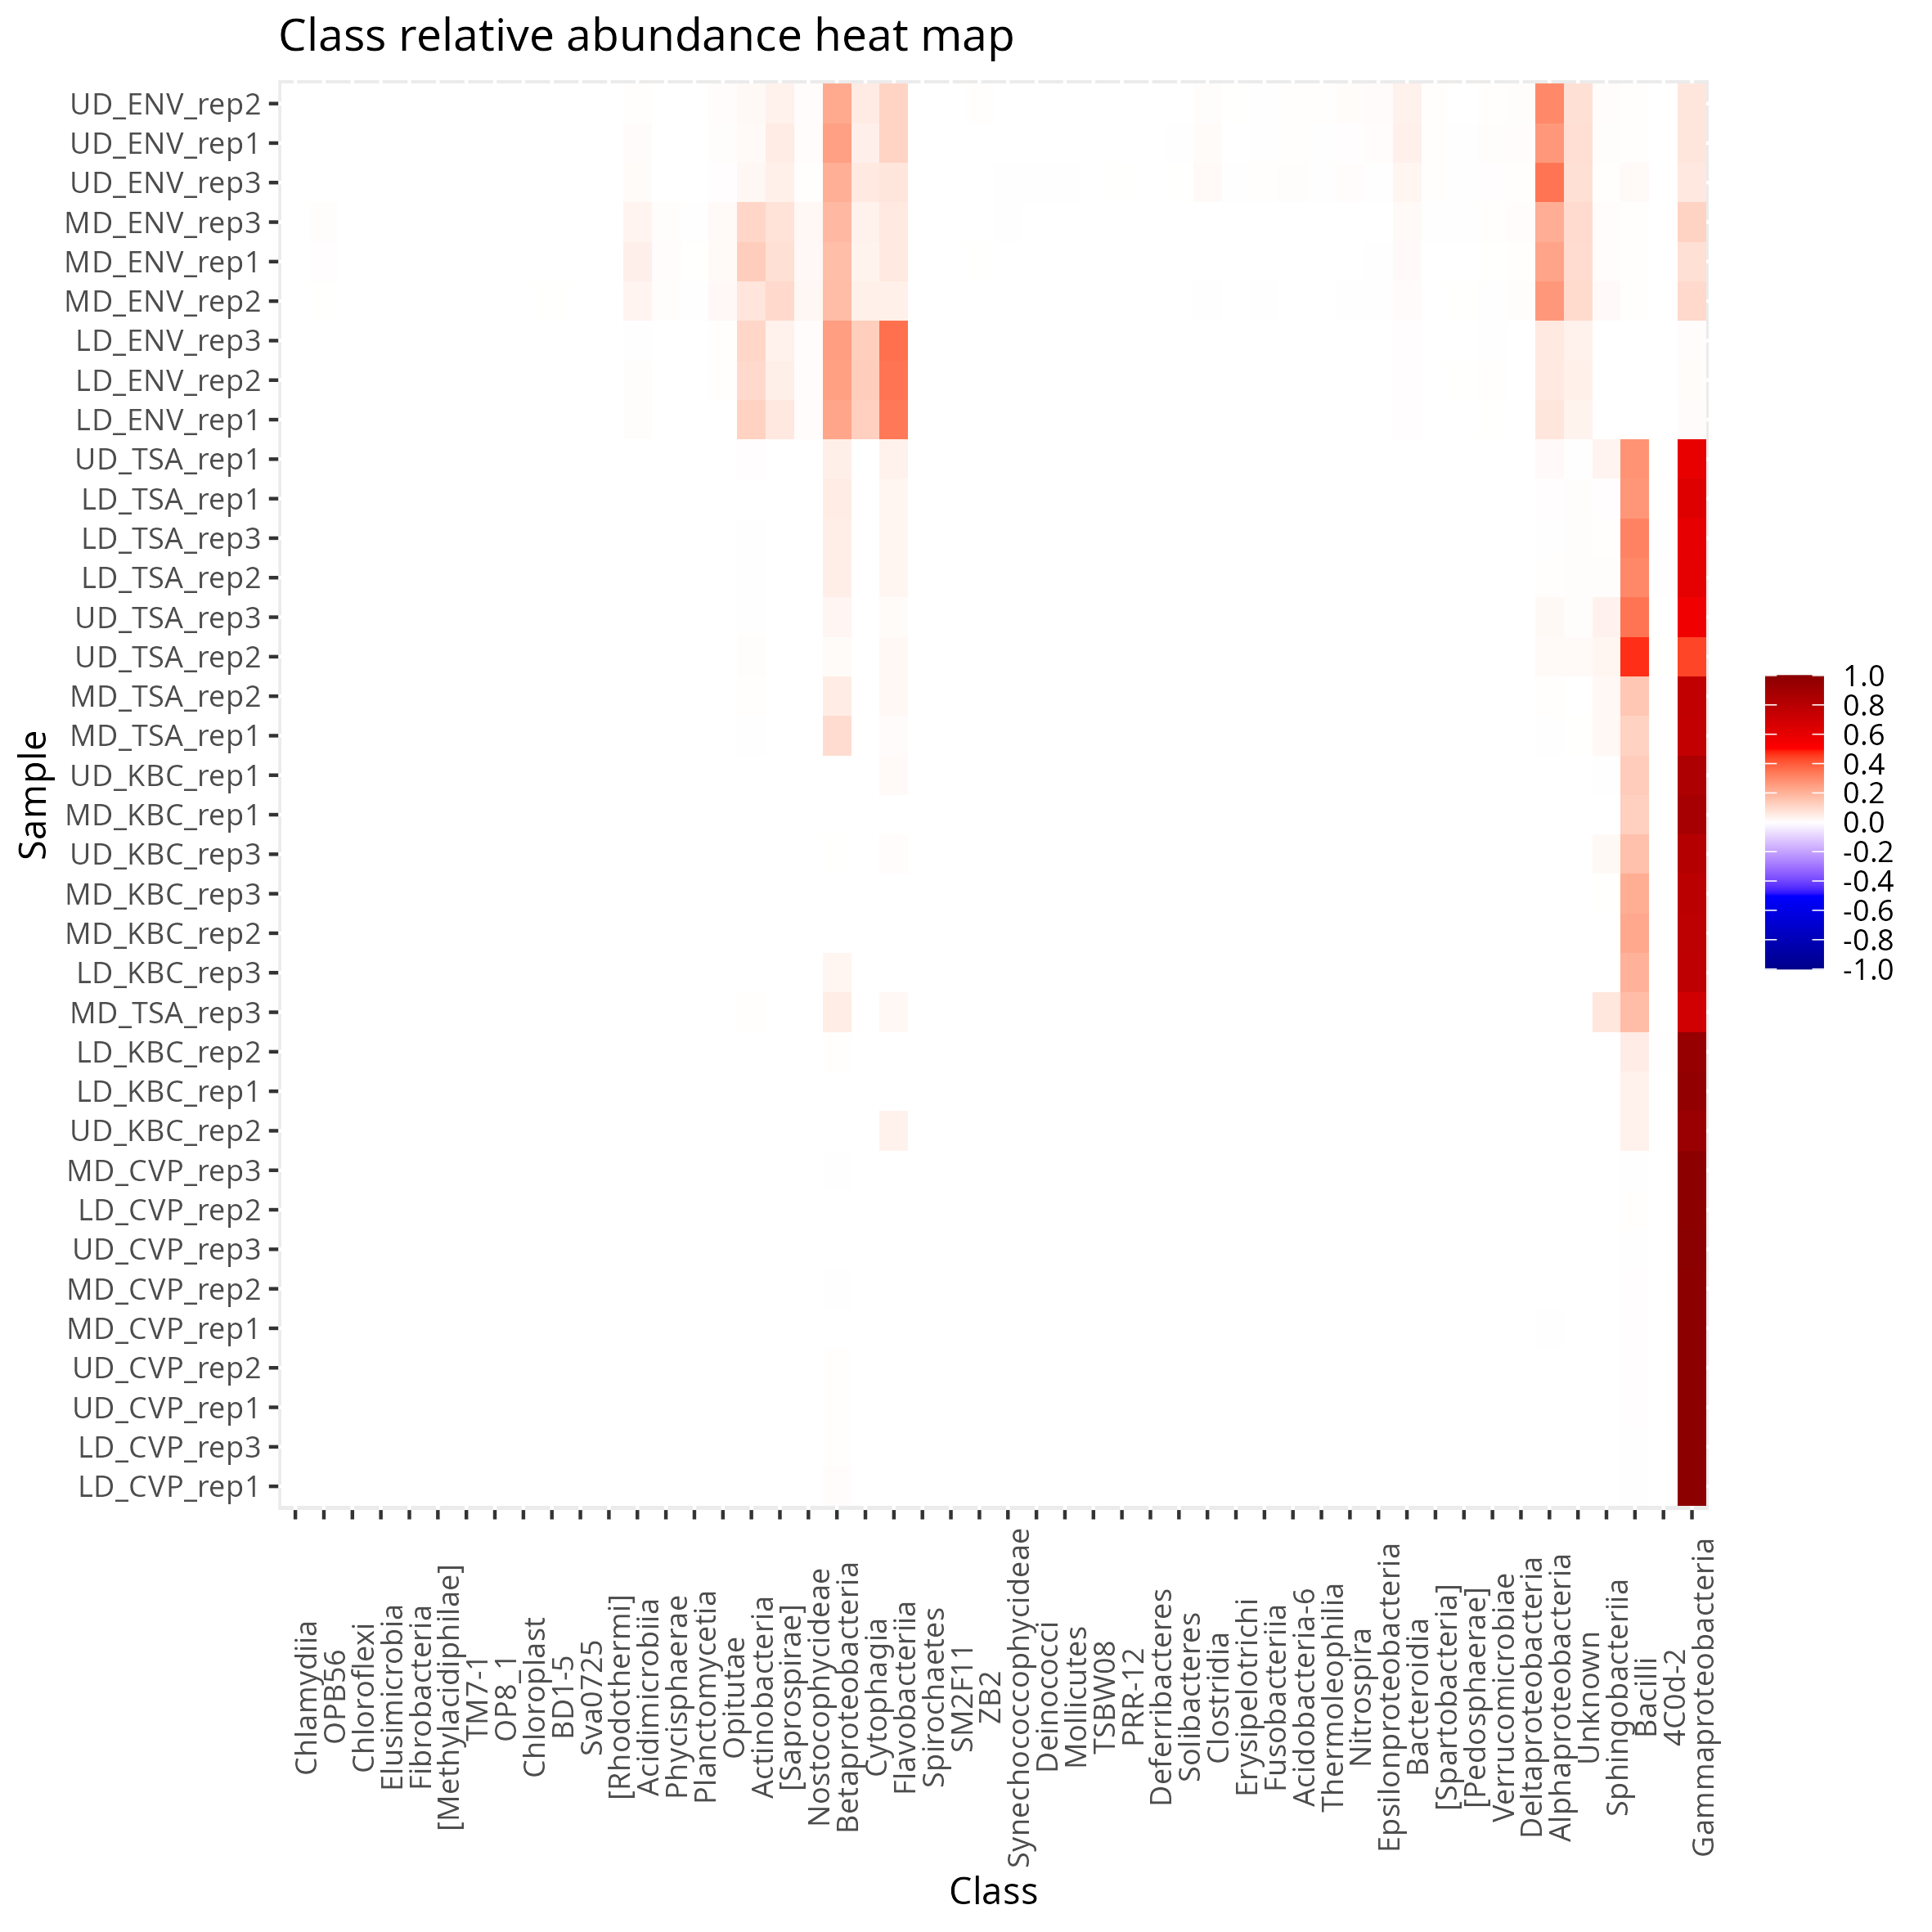

In [14]:
#Quick Class based relative abundance heatmap
#Convert abundance table to relative abundance (compositional) table
pseq_relabund <- microbiome::transform(pseq, "compositional")
#Class phyloseq
class_relabund_pseq <- microbiome::aggregate_taxa(pseq_relabund, "Class", verbose=FALSE)
#Produce heatmap ggplot
class_heatmap  <- microbiome::plot_composition(class_relabund_pseq, plot.type = "heatmap") +
    xlab("Class") + ylab("Sample") +
    ggtitle("Class relative abundance heat map")
#Save ggplot object as png
ggsave(filename = "./class_relabund_heatmap.png", plot = class_heatmap, 
       device = "png", dpi = 300, units = "mm", height = 200, width = 200)
#Display plot
IRdisplay::display_png(file="./class_relabund_heatmap.png")